In [1]:
from pgmpy.models import BayesianNetwork
from pgmpy.utils import get_example_model
from pgmpy.factors.discrete.CPD import TabularCPD
from IPython.display import Image
import numpy as np

/home/fsimoes/.virtualenvs/minimal-set-conditional-intervention-bandi-fdoGEKC9/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


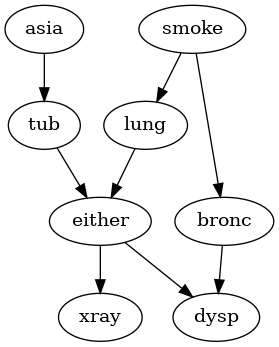

In [2]:
model = get_example_model('asia')
graph = model.to_graphviz()
graph.draw('lung_cancer.png', prog='dot')
Image('lung_cancer.png')

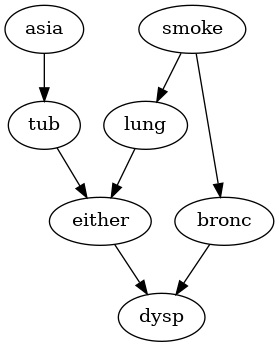

In [3]:
model.get_ancestral_graph(['dysp']).to_graphviz().draw('dysp_ancestral.png', prog='dot')
Image('dysp_ancestral.png')

In [4]:
list(model.get_ancestral_graph(['dysp']).nodes)

['asia', 'tub', 'smoke', 'lung', 'bronc', 'either', 'dysp']

In [5]:
list(model._get_ancestors_of(['dysp']))

['bronc', 'dysp', 'asia', 'tub', 'lung', 'smoke', 'either']

In [6]:
df = model.simulate(n_samples=10, do={'lung': 'no'}) 

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 851.67it/s]


In [7]:
list(df['dysp'])

['no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no']

In [8]:
(model.simulate(n_samples=1000, do={'either': 'no'})['dysp'] == 'no').sum()/1000

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 47936.00it/s]


np.float64(0.589)

In [9]:
model.get_state_probability({'dysp': 'yes'})

np.float64(0.4359706)

In [10]:
print(model.get_state_probability({'lung': 'yes'}))
print(model.get_state_probability({'lung': 'yes', 'smoke': 'yes'}))

0.05500000000000001
0.05


In [11]:
mutilated_model = model.do(['lung'])

In [12]:
mutilated_model.get_state_probability({'dysp': 'yes'})

np.float64(0.4393105)

In [13]:
print(mutilated_model.get_state_probability({'lung': 'yes'}))
print(mutilated_model.get_state_probability({'lung': 'yes', 'smoke': 'yes'}))

0.055
0.0275


In [14]:
#TODO: create CBN class with hard interventions. Then one can use get_state_probability to get the reward cpds!

In [15]:
mutilated_model.add_cpds(TabularCPD('lung', 2, np.array([[0.0, 1.0]]).T, state_names={'lung': ['yes', 'no']}))

In [16]:
print(mutilated_model.cpds[4])
print(mutilated_model.get_state_probability({'lung': 'yes'}))
print(mutilated_model.get_state_probability({'dysp': 'yes'}))

+-----------+---+
| lung(yes) | 0 |
+-----------+---+
| lung(no)  | 1 |
+-----------+---+
0.0
0.41890000000000005


In [17]:
model.states['lung']

['yes', 'no']

In [18]:
context_vars = ['asia', 'tub']

In [19]:
from itertools import product
list(product(*[model.states[var] for var in context_vars]))

[('yes', 'yes'), ('yes', 'no'), ('no', 'yes'), ('no', 'no')]

In [28]:
for node in model.nodes:
    print(type(node))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [29]:
model.get_parents('lung')

['smoke']

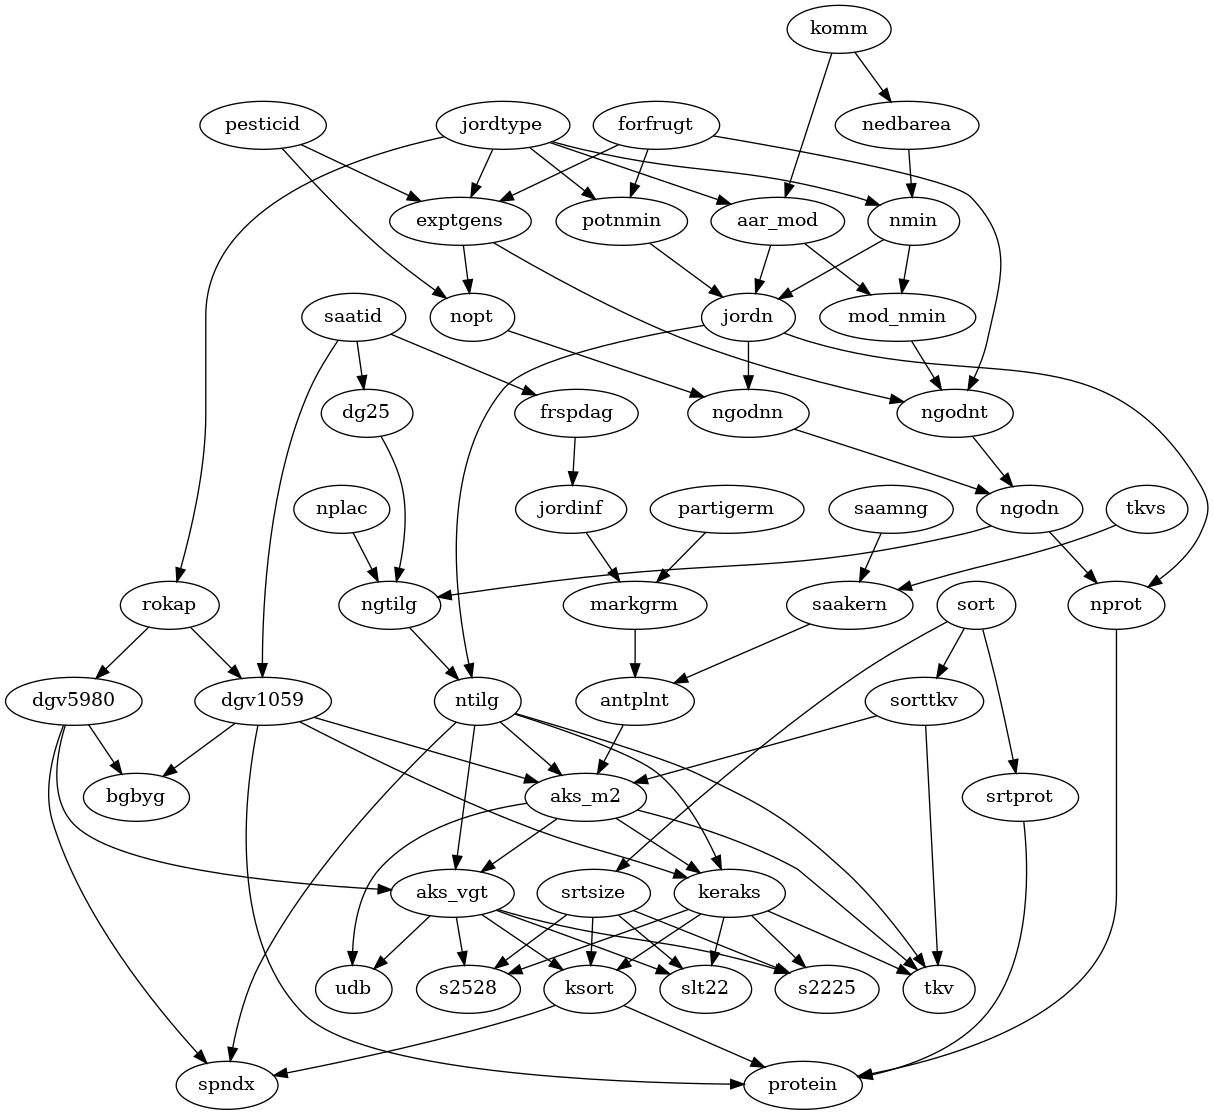

In [38]:
barley = get_example_model('barley')
graph2 = barley.to_graphviz()
graph2.draw('barley.png', prog='dot')
Image('barley.png')

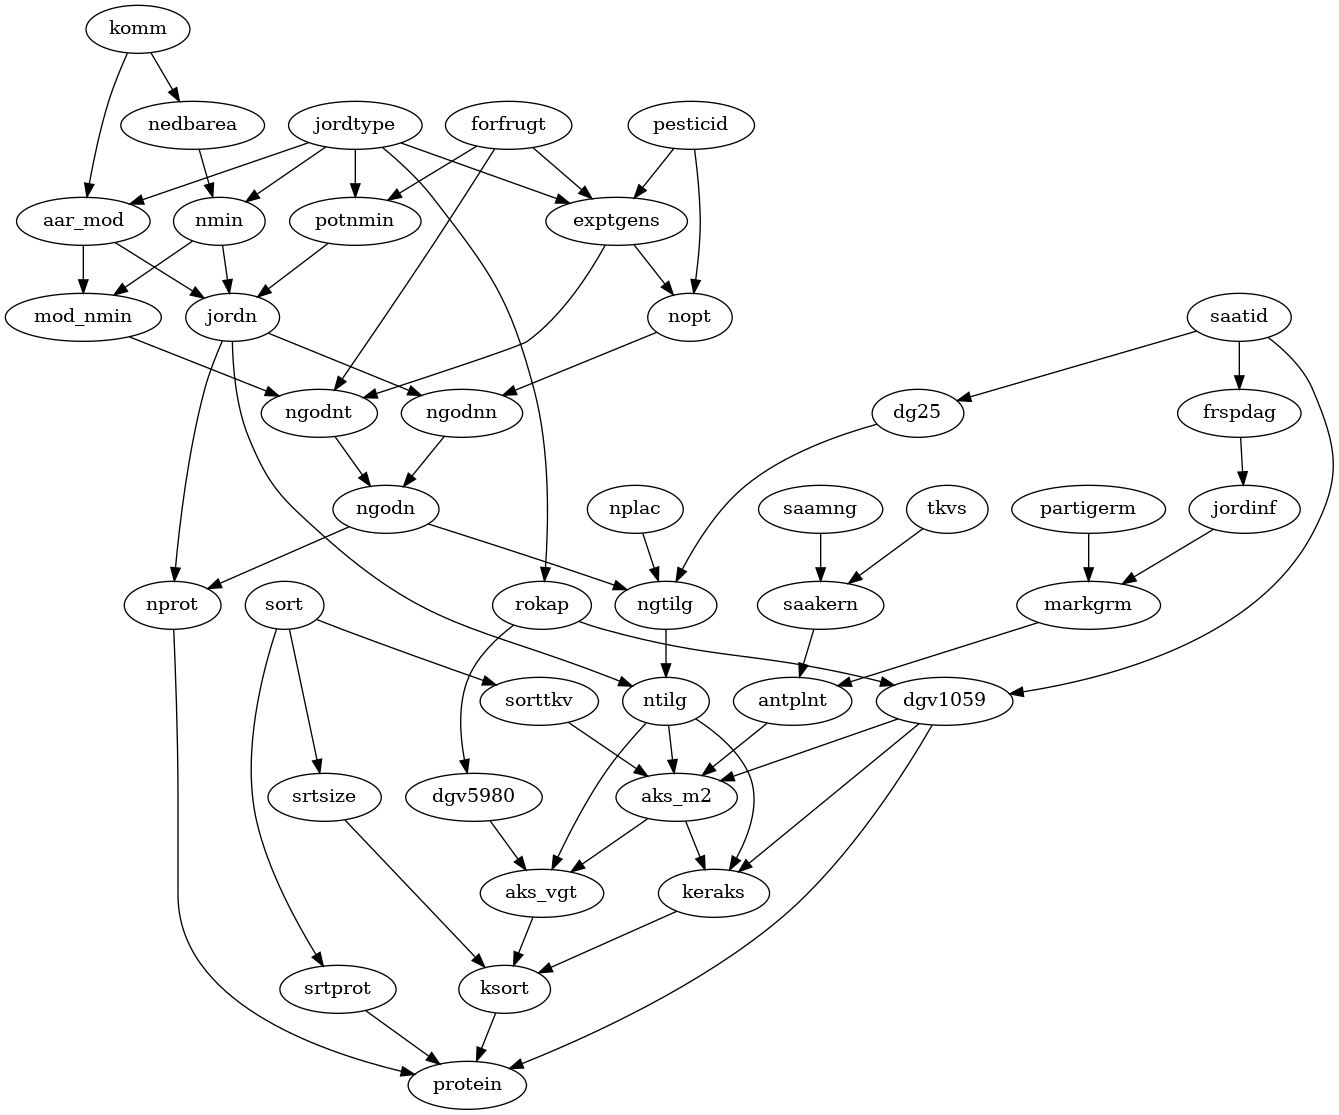

In [42]:
graph_protein_ancestors = barley.subgraph(barley._get_ancestors_of('protein')).to_graphviz()
graph_protein_ancestors.draw('protein_ancestral.png', prog='dot')
Image('protein_ancestral.png')